### Integrating functions by using Monte Carlo method

The mean value of a given function $f(x)$ within the range $[a, b]$ is defined as follows:

\begin{equation*}
    \bar{f} = \frac{1}{b - a} \int _ a ^ b f(x) \, dx
\end{equation*}

On the other hand, one can compute the mean of the function in this way:

\begin{equation*}
    \bar{f} \approx \frac{1}{N} \sum _ {k = 1} ^ N f(x_k)
\end{equation*}

Where $x_k$ is an uniform distributed variable within the range $[a, b]$ and $N$ is a very large number. By combining these two, we obtain:

\begin{equation*}
    \int _ a ^ b f(x) \, dx \approx \frac{b - a}{N} \sum _ {k = 1} ^ N f(x_k)
\end{equation*}


In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
# Defining the function to integrate
@jit(nopython = True, nogil = True)
def f(x):
    return (x * np.cos(x ** 2) * np.sin(x ** 2)) ** 2 * np.exp(- x ** 2)

In [3]:
# Defining the range
a = 0
b = 4

In [4]:
# Defining the number of points
N = 100_000

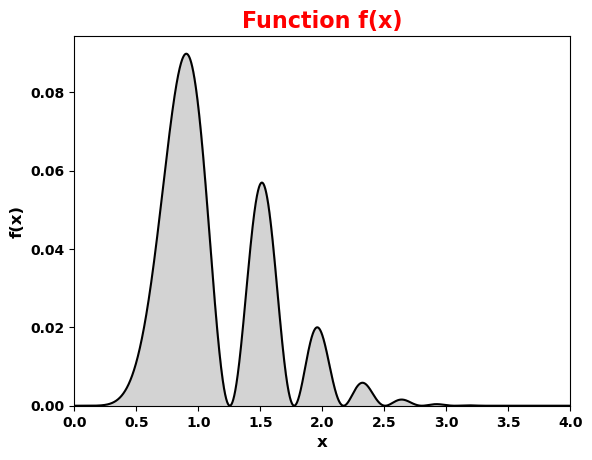

In [5]:
# Plotting the function within the range
x = np.linspace(a, b, int((b - a) / 1e-04))
y = f(x)

plt.plot(x, y, color = "black")
plt.xlim(a, b)
plt.ylim(0)
plt.title("Function f(x)", fontweight = "bold", fontsize = 16, color = "red")
plt.xlabel("x", fontweight = "bold", fontsize = 12)
plt.ylabel("f(x)", fontweight = "bold", fontsize = 12)
plt.setp(plt.gca().get_xticklabels(), fontweight = "bold")
plt.setp(plt.gca().get_yticklabels(), fontweight = "bold")
plt.fill_between(x, y, color = "lightgray")
plt.show()

In [6]:
@jit(nopython = True, nogil = True)
def integral():
    x = np.random.uniform(a, b, N)
    y = f(x)

    return (b - a) * np.mean(y)

In [7]:
# Computing a few values
integral()

0.057963730436728526

In [8]:
integral()

0.05816378223605713

In [9]:
integral()

0.05789824079943232

In [10]:
# Monte Carlo integration
@jit(nopython = True, nogil = True)
def integral_array():
    M = int(N / 2)
    values = np.zeros(M)

    for i in range(M):
        values[i] = integral()
    
    return values

In [11]:
# Computing an array of values
values = integral_array()
values

array([0.05809172, 0.05772271, 0.05804009, ..., 0.05847815, 0.05803984,
       0.05849513])

In [12]:
# Mean of the distribution
integral = np.mean(values)
integral

0.05807316064705476

In [13]:
# Standard deviation of the distribution
error = np.std(values)
error

0.0003056454849613381

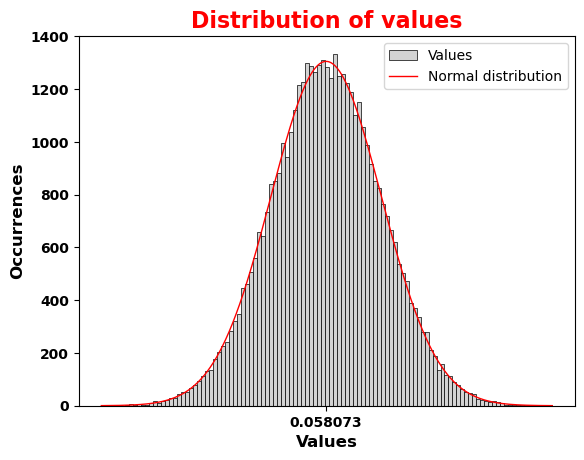

In [14]:
# Histogram of values
x = np.linspace(np.min(values), np.max(values), int((np.max(values) - np.min(values))/ 1e-06))

plt.hist(values, bins = "auto", density = True, color = "lightgray", edgecolor = "black", linewidth = 0.5, label = "Values")
plt.plot(x, (1 / (np.sqrt(2 * np.pi) * error)) * np.exp(- 0.5 * ((x - integral) / error) ** 2), color = "red", linewidth = 1, label = "Normal distribution")
plt.title("Distribution of values", fontweight = "bold", fontsize = 16, color = "red")
plt.xlabel("Values", fontweight = "bold", fontsize = 12)
plt.ylabel("Occurrences", fontweight = "bold", fontsize = 12)
plt.setp(plt.gca().get_xticklabels(), fontweight = "bold")
plt.xticks([integral])
plt.setp(plt.gca().get_yticklabels(), fontweight= "bold")
plt.legend()
plt.show()

By this method, we've found the result: $0.0581 \pm 0.0003 \, (0.5 \%)$

In [15]:
# Computing the integral using quad from scipy.optimize module
from scipy.integrate import quad
quad(f, a, b)[0]

0.05807433721510848

Let's now extend the code to handle double integrals:

\begin{equation*}
    \int _ a ^ b \int _ c ^ d f(x,y) \, dx \, dy \approx \frac{(b - a) \, (d - c)}{N} \sum _ {k = 1} ^ N f(x_k, y_k)
\end{equation*}

In [16]:
# Defining the function to integrate (double integral)
@jit(nopython = True, nogil = True)
def f(x, y):
    return (x * np.cos(x ** 2) * np.sin(y ** 2)) ** 2 * np.exp(- x ** 2 - y ** 2)

In [17]:
# Defining the ranges for x and y
a, b = 0, 4  # Range for x
c, d = 0, 4  # Range for y

# Defining the number of points
N = 100_000

In [18]:
# Monte Carlo double integration
@jit(nopython = True, nogil = True)
def double_integral():
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(c, d, N)
    
    z = f(x, y)
    area = (b - a) * (d - c)

    return np.sum(z) * area / N

In [19]:
# Computing some values
double_integral()

0.040781152189394654

In [20]:
double_integral()

0.041647290722186835

In [21]:
double_integral()

0.04141397633779264

In [22]:
# Monte Carlo double integration with error estimation
@jit(nopython = True, nogil = True)
def double_integral_array():
    M = int(N / 2)
    values = np.zeros(M)

    for i in range(M):
        values[i] = double_integral()

    return values

In [23]:
# Computing multiple estimations
values = double_integral_array()

In [24]:
# Mean of the distribution
integral = np.mean(values)
integral

0.04119122108826633

In [25]:
# Standard deviation of the distribution (error)
error = np.std(values)
error

0.0004151191190394612

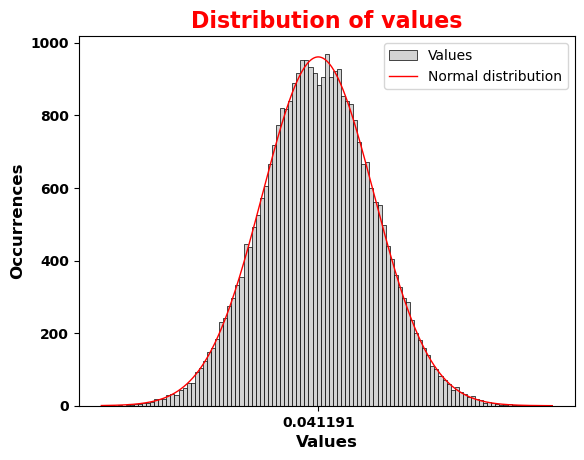

In [26]:
# Histogram of values
x = np.linspace(np.min(values), np.max(values), int((np.max(values) - np.min(values))/ 1e-06))

plt.hist(values, bins = "auto", density = True, color = "lightgray", edgecolor = "black", linewidth = 0.5, label = "Values")
plt.plot(x, (1 / (np.sqrt(2 * np.pi) * error)) * np.exp(- 0.5 * ((x - integral) / error) ** 2), color = "red", linewidth = 1, label = "Normal distribution")
plt.title("Distribution of values", fontweight = "bold", fontsize = 16, color = "red")
plt.xlabel("Values", fontweight = "bold", fontsize = 12)
plt.ylabel("Occurrences", fontweight = "bold", fontsize = 12)
plt.setp(plt.gca().get_xticklabels(), fontweight = "bold")
plt.xticks([integral])
plt.setp(plt.gca().get_yticklabels(), fontweight= "bold")
plt.legend()
plt.show()

Result: $0.0412 \pm 0.0004 \, (1 \%)$

In [27]:
# Computing the double integral using dblquad from scipy.optimize module
from scipy.integrate import dblquad
dblquad(lambda x, y: (x * np.cos(x ** 2) * np.sin(y ** 2)) ** 2 * np.exp(-x ** 2 - y ** 2), 0, 4, 0, 4)[0]

0.0411897937175527

By the way we can easily extend this code to handle any multi-dimensional integral as well